In [9]:
from alpaca_test import get_stuff_to_trade, calculate_indicators
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import configparser
import sys
import os
%matplotlib inline

In [10]:
# raw_data, symbol   = get_stuff_to_trade()
raw_data    = "C:\\Users\\benjamin.beale\\Projects\\cryptoconda\\data\\VRSK_data_1568981547.3181224.csv"
symbol      = "VRSK"
data        = calculate_indicators(raw_data, symbol)
ticker      = data["ticker"]
ic          = data["raw_data"]
macd        = data["raw_macd"]
mfi         = data["raw_mfi"]
# roc     = data["roc"]
# stoc    = data["stoc"]
# limit   = data["limit"]

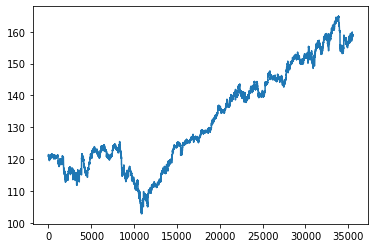

In [11]:
plt.plot(ic["close"])

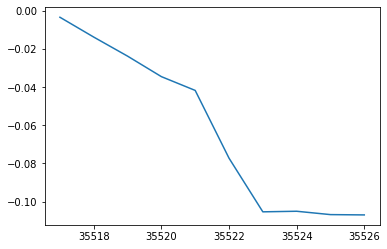

In [12]:
plt.plot(macd)

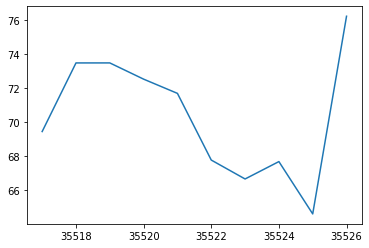

In [13]:
plt.plot(mfi)

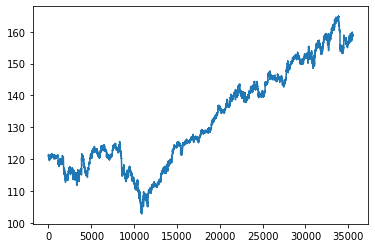

In [ ]:
# roc.plot()

In [ ]:
# stoc.plot()

In [ ]:
# df1 = macd[:100]
# df2 = ic
# df3 = rsi[:100]
# print(df1)
# df1.index = df2.index
# print(df2)
# df1.index = df3.index
# print(df3)
# 
# fig, ax1 = plt.subplots()
# ax1.plot(df1, 'b-')
# ax2 = ax1.twinx()
# ax2.plot(df2, 'r-')
# ax3 = ax1.twinx()
# ax3.plot(df3, 'r-')
# plt.title('MACD vs Close Price')
# plt.show()

In [8]:
config = configparser.ConfigParser()

try:
    config.read(os.path.relpath("config.ini"))
except FileExistsError as e:
    print("FileExistsError: {}".format(e))
    sys.exit(1)
api                     = tradeapi.REST(
    base_url    = config["alpaca"]["APCA_API_BASE_URL"],
    key_id      = config["alpaca"]["APCA_API_KEY_ID"],
    secret_key  = config["alpaca"]["APCA_API_SECRET_KEY"],
    api_version = config["alpaca"]["VERSION"]
)

In [9]:
# print("RSI:         ", rsi.iloc[0])
# print("Stoch. Osc1: ", stoc.iloc[0]["SlowD"])
# print("Stoch. Osc2: ", stoc.iloc[0]["SlowK"])
# print("MACD:        ", macd.iloc[0])
# print("ROC:         ", roc.iloc[0])
# 
# print("all:         ", (rsi.iloc[0] > 80 and stoc.iloc[0] > 80 and macd.iloc[0] > 0 and roc.iloc[0] > 0))
# 

RSI:          61.7875
Stoch. Osc1:  40.7018
Stoch. Osc2:  42.1051
MACD:         -0.0481
ROC:          37.6667
all:          False


In [ ]:
# if rsi[0] > 80 and stoc[0] > 80 and macd[0] > 0 and roc[0] > 0:
# 
#     api.submit_order(
#         symbol=symbol,
#         qty=100,
#         side="sell",
#         type="limit",
#         time_in_force="opg",
#         limit_price=limit
#     )
    

In [ ]:
    # Submit a market order to buy 1 share of Apple at market price
    # api.submit_order(
    #     symbol="AAPL",
    #     qty=1,
    #     side="buy",
    #     type="market",
    #     time_in_force="gtc"
    # )